In [2]:
import torch
import matplotlib.pyplot as plt
import ESN
import time
import numpy as np
torch.set_default_device("cuda:0")
torch.set_default_dtype(torch.double)
# Parameters
Two,Ttrain = 2000,10000
N = 100
C = 0.9
rho = 0
dim = 1
idWin = False


N_d = int(N * dim)
maxtau = int(N_d * 2)
taus = np.arange(1,maxtau)



torch.manual_seed(0)



#u_asym = torch.rand(1, Two + Ttrain)

x = torch.normal(0,1,(1,Two+Ttrain),device="cuda:0")
u_sym = torch.tensor([[ torch.sum(x[:,:t+1],1) for t in range(Two+Ttrain)]])
u_tilde = x

esn = ESN.ESN_mult(N_d, uC=C, dim=dim,rseed=0,idWin=idWin)

st = time.time()
Xwo = esn.run_washout(u_sym, Two, actf="identity",bias=False)
print("runtime :",time.time()-st)

st = time.time()
#
raw,lin,rev,sur = ESN.MC_cSVD_asym(u_sym, Xwo, maxtau,ret_all=True)
raw_tilde,lin_tilde,rev_tilde,sur_tilde = ESN.MC_cSVD_asym(u_tilde, Xwo, maxtau,ret_all=True)


mfs=rev
mfs_tilde=rev_tilde

print("calc time :",time.time()-st)


runtime : 1.4497509002685547
calc time : 0.21520018577575684


In [3]:

totMC = torch.sum(mfs).cpu().numpy()
totMC_tilde = torch.sum(mfs_tilde).cpu().numpy()
print("totMC_tilde : ",totMC_tilde)
print(f"totMC:{totMC}\nsurrogate value: {sur.cpu().numpy()}")



totMC_tilde :  99.04825426689936
totMC:197.89536293918368
surrogate value: [0.00692873]


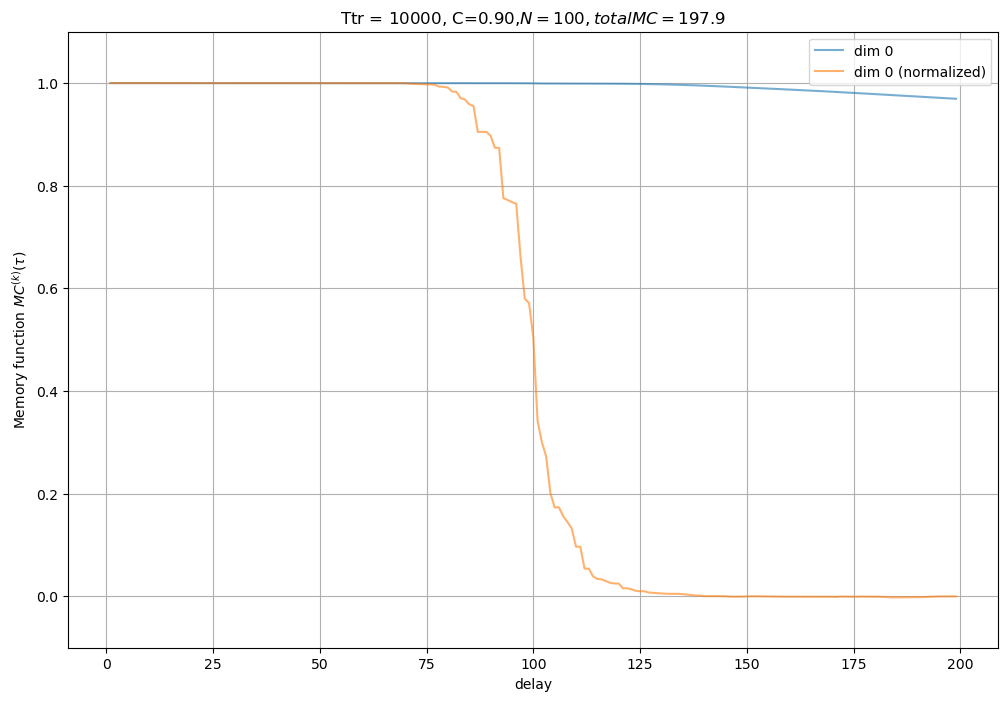

In [9]:
fig,ax = plt.subplots(figsize=(12,8))
for d in range(dim):
    plt.plot(taus,mfs[d].cpu().numpy(),alpha=0.6,label="dim "+str(d))
    plt.plot(taus,mfs_tilde[d].cpu().numpy(),alpha=0.6,label= "dim "+str(d)+" (normalized)")
    
plt.ylim(-0.1,1.1)
plt.xlabel("delay")
plt.ylabel(r'Memory function $MC^{(k)}(\tau)$')
plt.title(r'Ttr = %d, C=%.2f,$N=%d, totalMC=%.1f$'%(Ttrain,C,N_d,totMC))
#
plt.legend()
plt.grid(True)

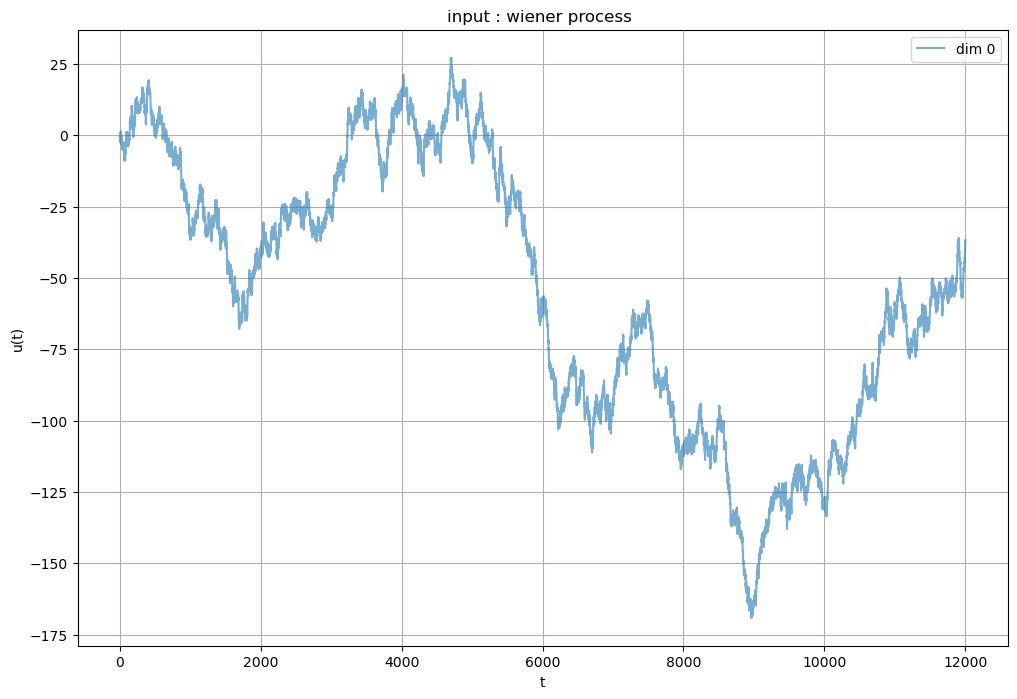

In [8]:
fig,ax = plt.subplots(figsize=(12,8))
maxT=100000
maxT=-1

t=np.arange(Two+Ttrain)

for d in range(dim):
    plt.plot(t[-maxT:],u_sym[d][-maxT:].cpu().numpy(),alpha=0.6,label="dim "+str(d))
    
    
#plt.ylim(-0.1,1.1)
plt.xlabel("t")
plt.ylabel(r'u(t)')
plt.title('input : wiener process ')
#
plt.legend()
plt.grid(True)